# Exercises: CLUSTERING - Modeling

<a href = "https://ds.codeup.com/clustering/model/#exercises">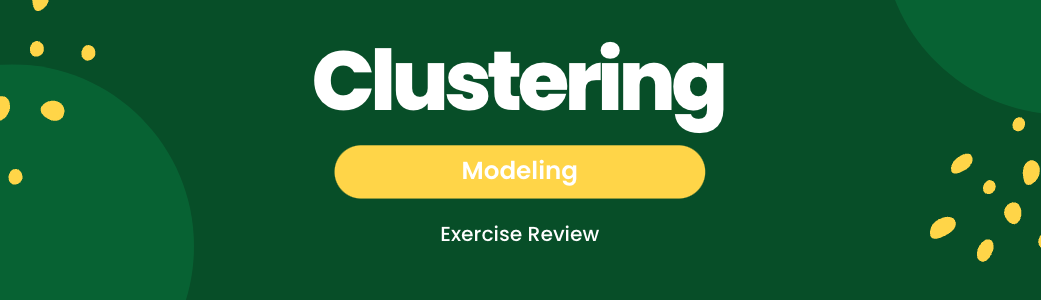</a>

<hr style="border:2px solid gray">

In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import mall_wrangle as mw


Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository.

# 1. Clustering with the `Iris` Dataset
 Using this lesson as a guide, perform clustering on the `iris` dataset.

In [2]:
#Read in iris dataset
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
seed = 123

train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    
train, validate = train_test_split(train_validate, test_size=0.25, random_state=seed)

## 1a. Choose features other than the ones used in the lesson.

In [4]:
#Declare an X subset of the data
X_train = train[['petal_width', 'sepal_width']]

In [5]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X_train)

# USE the thing
kmeans.predict(X_train)

array([1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 2], dtype=int32)

In [6]:
#Create a new column in the dataframe of my predictions
train['cluster'] = kmeans.predict(X_train)

In [7]:
train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
86,6.7,3.1,4.7,1.5,versicolor,1
82,5.8,2.7,3.9,1.2,versicolor,1
109,7.2,3.6,6.1,2.5,virginica,2


## 1b. Visualize the results of your clustering.

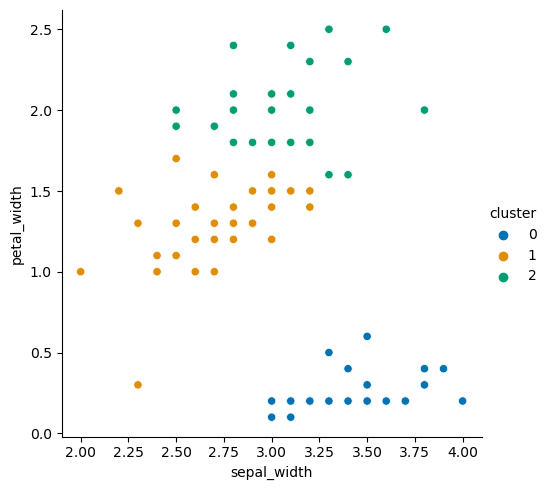

In [8]:
#Plot my predictions
sns.relplot(x='sepal_width', y='petal_width', hue='cluster', palette='colorblind', data=train)

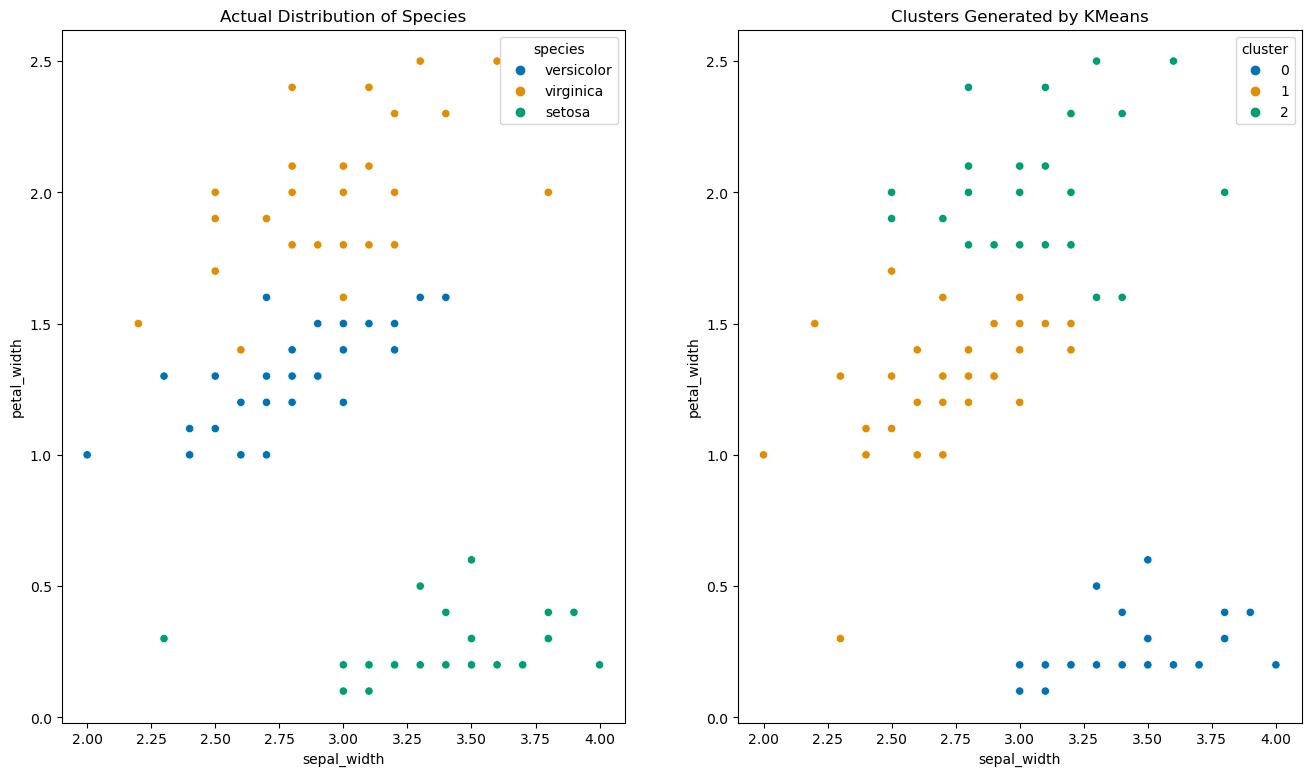

In [9]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='sepal_width', y='petal_width', hue='species', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Species")

sns.scatterplot(ax=axes[1], x='sepal_width', y='petal_width', hue='cluster', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

## 1c. Use the elbow method to visually select a good value for k.

In [10]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,8):
    kmeans = KMeans(k)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    
inertia_list


[22.512275132275132,
 12.396077533577532,
 9.259391025641026,
 7.368659509350299,
 5.757109126984128,
 4.874999999999999]

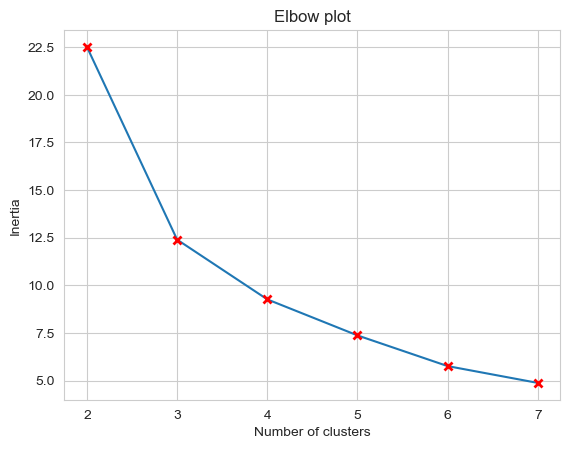

In [11]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,8), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

## 1d. Repeat the clustering, this time with 3 different features.

In [12]:
#Declare an X subset of the data with 3 features
X2_train = train[['sepal_length', 'petal_length', 'sepal_width']]

In [14]:
#Initialize KMeans and fit it to the X2 subset:

# MAKE the thing
kmeans2 = KMeans(3)

# FIT the thing
kmeans2.fit(X2_train)

# USE the thing
kmeans2.predict(X2_train)


array([0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       1, 2], dtype=int32)

In [15]:
#Store my predictions in the dataframe

train['cluster_3f'] = kmeans2.predict(X2_train)

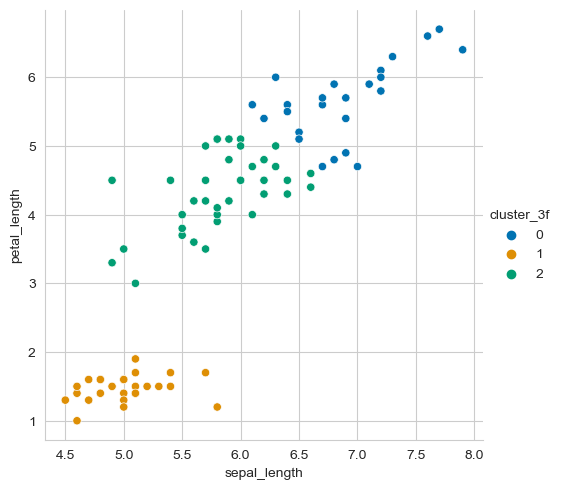

In [16]:
#Visualize my results

sns.relplot(x='sepal_length', y='petal_length', hue='cluster_3f', palette='colorblind', data=train)
plt.show()

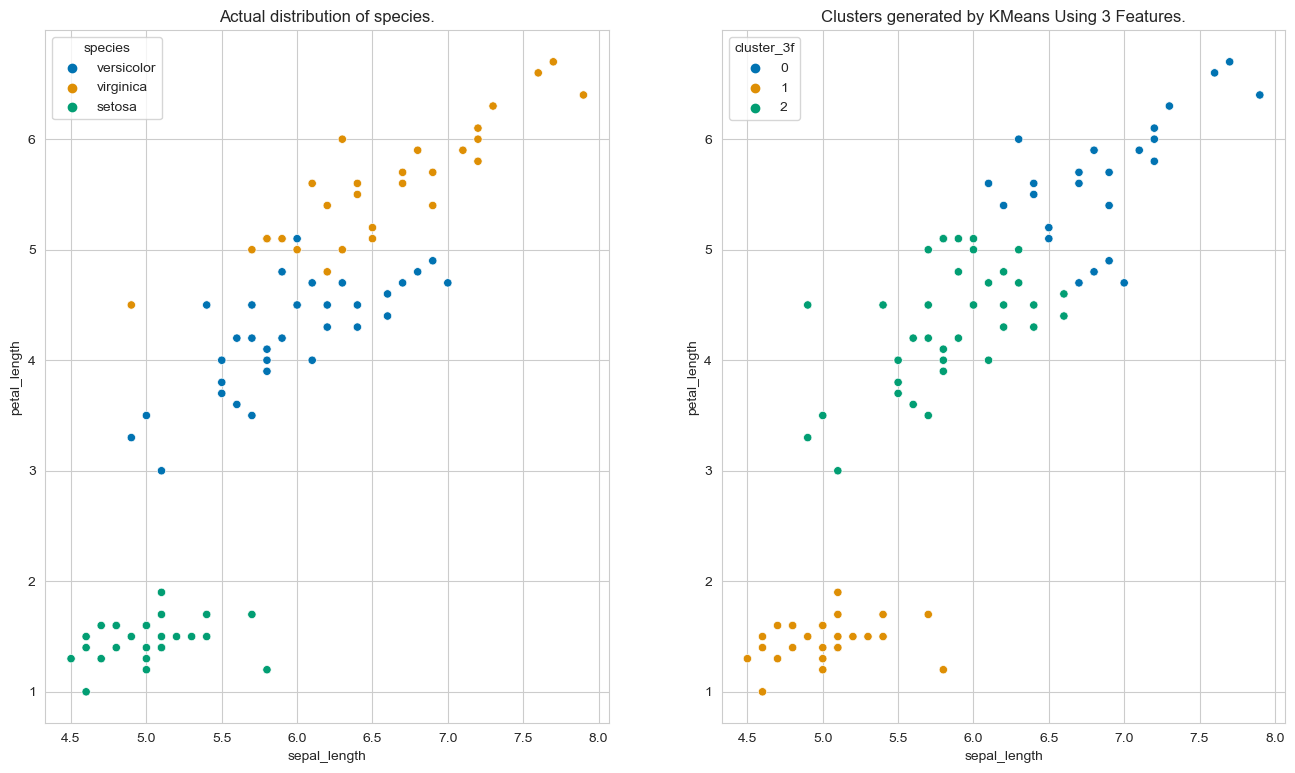

In [20]:
#Compare my results to the actual distribution of species
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='sepal_length', y='petal_length', hue='species',palette='colorblind', data=train)
axes[0].set_title('Actual distribution of species.')


sns.scatterplot(ax=axes[1], x='sepal_length',y='petal_length', hue='cluster_3f',palette='colorblind', data=train)
axes[1].set_title('Clusters generated by KMeans Using 3 Features.')

plt.show()

In [22]:
#Fill a list with inertia values for increasing number of clusters
inertia_list_3f = []

for k in range(2, 13):
    kmeans3 = KMeans(k)
    kmeans3.fit(X_train)
    inertia_list_3f.append(kmeans3.inertia_)

inertia_list_3f    

[22.512275132275132,
 12.396444947209652,
 9.259391025641026,
 7.368659509350299,
 5.7348101503759406,
 4.869601190476191,
 4.215826007326006,
 3.5419365079365073,
 3.1073246753246755,
 2.8168207070707068,
 2.448670634920635]

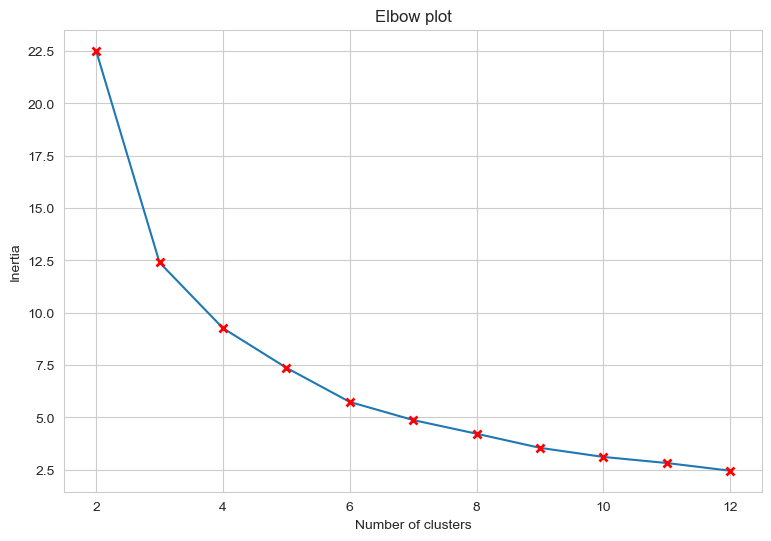

In [23]:
#Beautiful elbow graph
sns.set_style("whitegrid")  # Set the grid style
plt.figure(figsize=(9, 6))
sns.lineplot(x=range(2, 13), y=inertia_list_3f, marker='x',markeredgewidth=2, markeredgecolor='red')

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the `mall_customers` dataset. Be sure to visualize your results!

In [24]:
#Read in the mall dataset
mall_train, mall_validate, mall_test = mw.wrangle_mall_df()

mall_train.head()


,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


In [25]:
#Select a couple features for clustering

mall_X=mall_train[['age', 'annual_income']]

In [26]:
#Initialize the KMeans model and fit it to my features
# MAKE the thing
mall_kmeans=KMeans(5)

# FIT the thing
mall_kmeans.fit(mall_X)

#USE the thing
mall_kmeans.predict(mall_X)

array([0, 2, 1, 0, 3, 1, 0, 0, 2, 2, 2, 4, 3, 2, 4, 2, 4, 3, 0, 2, 2, 1,
       0, 1, 3, 1, 2, 3, 2, 1, 4, 2, 3, 4, 1, 3, 1, 0, 4, 2, 1, 4, 4, 1,
       3, 1, 1, 0, 3, 2, 2, 0, 4, 3, 4, 0, 1, 2, 4, 3, 1, 4, 4, 2, 4, 1,
       1, 4, 0, 1, 4, 0, 2, 1, 3, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 2, 2, 3,
       3, 2, 2, 2, 1, 4, 3, 2, 3, 4, 2, 1, 2, 1, 1, 4, 4, 1, 4, 0, 1, 3,
       3, 4, 4, 1, 4, 4, 4, 3], dtype=int32)

In [27]:
#Store the clusters in a new column

mall_train['cluster'] = mall_kmeans.predict(mall_X)

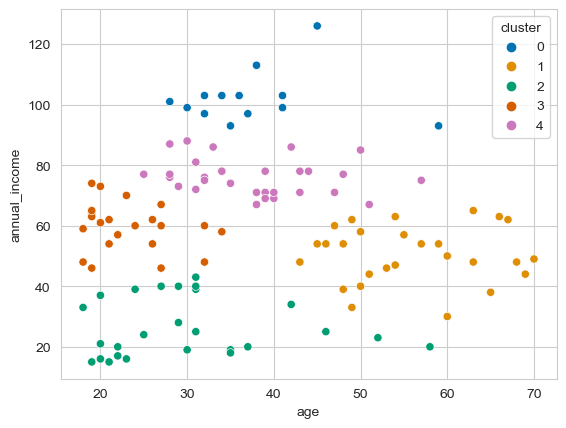

In [28]:
#Visualize the results

sns.scatterplot(x='age', y='annual_income', hue='cluster', palette='colorblind', data=mall_train)
plt.show()

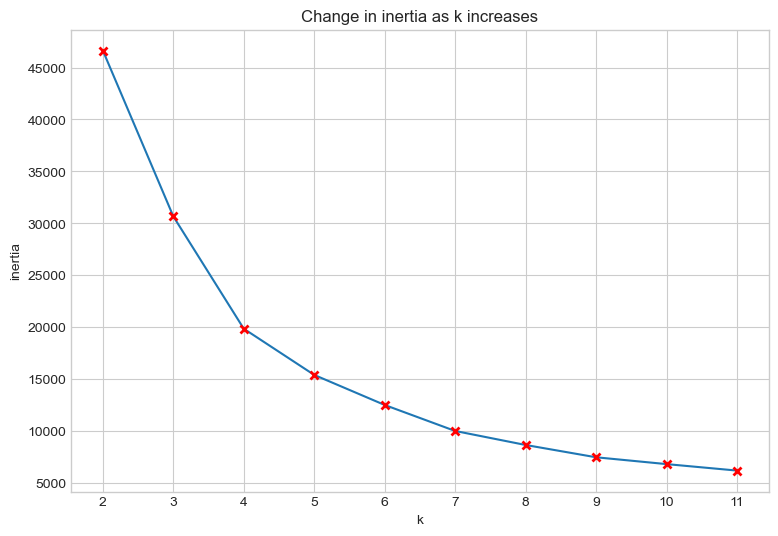

In [29]:
# lets plot inertia vs k

plt.style.use('seaborn-whitegrid')  # Set the grid style
plt.figure(figsize=(9, 6))

pd.Series({k: KMeans(k).fit(mall_X).inertia_ for k in range(2, 12)}).plot(marker='x',markeredgewidth=2, markeredgecolor='red')

plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.show()

# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [30]:
#Create a copy of my original dataframe to scale

mall_df_scale = mall_train.copy()

In [31]:
#Create an instance of the scaler and fit/transform the same features I used before

mms = MinMaxScaler()

mall_df_scale[['age', 'annual_income']] = mms.fit_transform(mall_df_scale[['age', 'annual_income']])

mall_df_scale.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,0.269231,0.738739,86,0,0
49,0.211538,0.225225,42,0,2
35,0.596154,0.162162,14,0,1
186,0.230769,0.756757,97,1,0
114,0.019231,0.441441,46,1,3


In [32]:
#Subset these scaled features for training

X_scale=mall_df_scale[['age', 'annual_income']]

In [33]:
#Fit a new model to my scaled data

# MAKE the thing
kmeans_scale = KMeans(5)

# FIT the thing
kmeans_scale.fit(X_scale)

# USE the thing
kmeans_scale.predict(X_scale)

array([0, 4, 2, 0, 1, 2, 0, 3, 4, 4, 4, 0, 1, 2, 0, 4, 1, 1, 0, 4, 4, 3,
       0, 2, 1, 2, 4, 1, 2, 3, 0, 4, 1, 0, 3, 1, 2, 0, 0, 4, 3, 1, 0, 3,
       1, 2, 3, 0, 1, 4, 4, 0, 0, 1, 0, 0, 3, 2, 0, 1, 3, 3, 0, 4, 0, 2,
       2, 0, 0, 3, 0, 0, 4, 3, 1, 0, 0, 0, 1, 2, 2, 1, 0, 4, 1, 4, 2, 1,
       1, 4, 4, 4, 2, 0, 1, 4, 1, 1, 4, 2, 4, 2, 3, 0, 0, 3, 0, 0, 2, 1,
       1, 0, 1, 3, 0, 3, 1, 1], dtype=int32)

In [34]:
#Store the resuts in a new column

mall_df_scale['cluster'] = kmeans_scale.predict(X_scale)

In [35]:
mall_df_scale.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,0.269231,0.738739,86,0,0
49,0.211538,0.225225,42,0,4
35,0.596154,0.162162,14,0,2
186,0.230769,0.756757,97,1,0
114,0.019231,0.441441,46,1,1


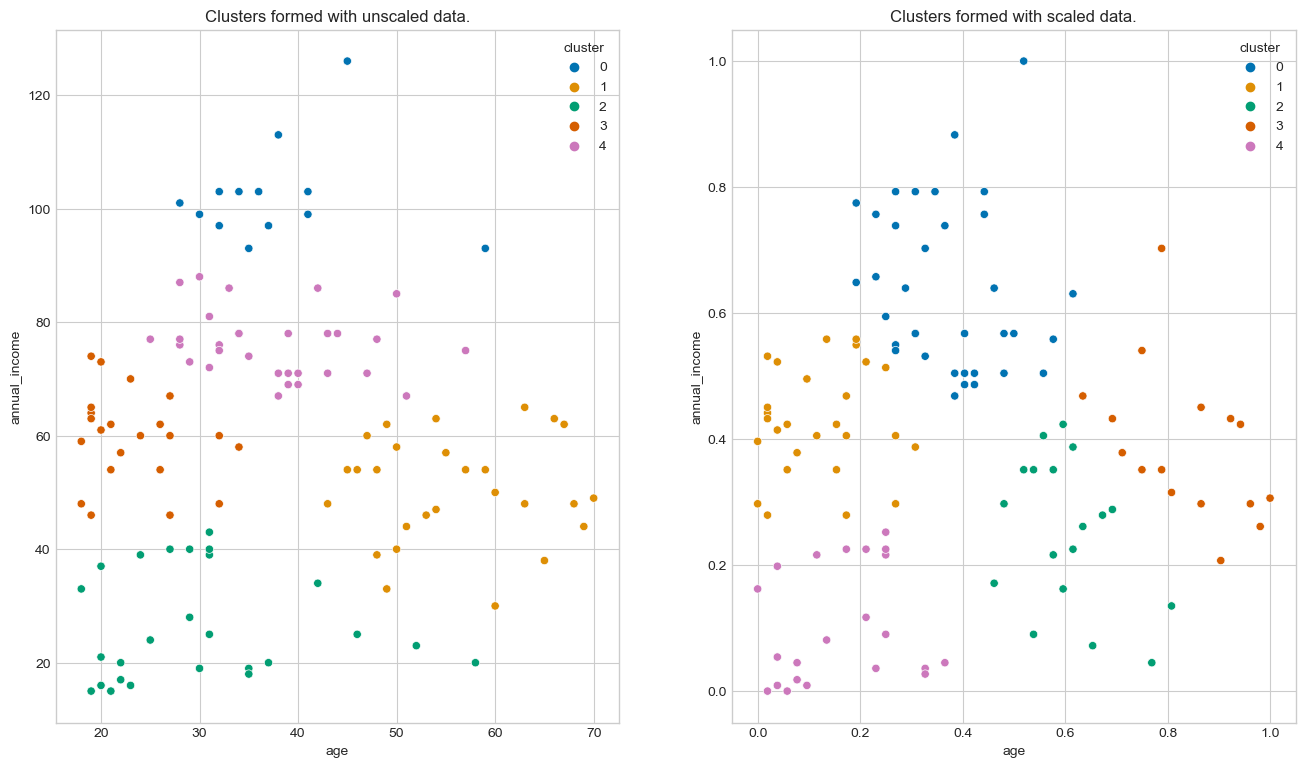

In [36]:
#Compare the clusters generated by scaled and unscaled data
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_train)
axes[0].set_title('Clusters formed with unscaled data.')

sns.scatterplot(ax=axes[1], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df_scale)
axes[1].set_title('Clusters formed with scaled data.')

plt.show()